<h1>Ground Truth Crops</h1>
This notebook is to crop ground truth images, should you need these for other experiments. This means getting the <b>real</b> Thermal and Visible, for their respective train and test sets, and taking manual crops. 

- real_A_train
- real_A_test
- real_B_train
- real_B_test

The below scripts need to only be run once for each directory. This is not necessary to measure the crops' image quality for each GAN experiment we ran. But, it is a script you can use if you might be interested in training favtGAN with crops and faces simultaneously, as this was an idea we had but did not try. The below cells have cropping dimensions that are specific to Eurecom and Iris, so do not mix them up. 


In [1]:
# import the necessary packages
from skimage.metrics import structural_similarity
import argparse
import imutils
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from PIL import Image               # to load images
from IPython.display import display # to display images

%matplotlib inline

In [2]:
import os
os.chdir('/Crops')

<h1>Eurecom</h1>

Need to resize Eurecom images to 256 x 256 to match the dimensions of the Test Images. Then we can pass through the cropping methods.

In [ ]:
test_path = "Eurecom/real_A_train"
outpath =  "Eurecom/new_real_A_train"
#dirs = os.listdir(path)
neww, newh = 256, 256

def resize_images(mypath, outpath):
    dirs = os.listdir(mypath)
    counter = 1
    for item in dirs:
        fullpath = os.path.join(mypath, item)
        if os.path.isfile(fullpath):
            counter += 1
            im = Image.open(fullpath)
            f, e = os.path.splitext(fullpath) #file and extension
            resized = im.resize((neww, newh), Image.ANTIALIAS) #resize
            save_fname = os.path.join(outpath, os.path.basename(f) +'.bmp')
            resized.save(save_fname, quality=100)
            if counter <=10:
                display(resized) #see in notebook

resize_images(test_path, outpath)

In [ ]:
test_path = "Eurecom/real_B_train"
outpath =  "Eurecom/new_real_B_train"
#dirs = os.listdir(path)
neww, newh = 256, 256

resize_images(test_path, outpath)

<h2>Crops</h2>
The below procedure must be repeated for: 

- real_A_train
- real_A_test
- real_B_train
- real_B_test

for both Eurecom and Iris.  This only needs to be done once, so that we have a set of eyes, mouth, and nose crops for the ground-truth visible and thermal images. Examples applied on the training sets are shown. Simply change the paths for the test sets.

<h3>Eurecom</h3>
Note these crops must be applied to Eurecom due to the left, top, right, bottom dimensions specifically for this dataset.

In [ ]:
# EYES

def crop_eyes(image):
    crop_array = []
    
    # image is file path
    im = Image.open(image) 
    
    # Setting the points for cropped image 
    left = (256/4) #25% to the left in
    top = 256 / 3
    right = 256 - (256/4) #25% to the right in
    bottom = 256  - 125

    # Cropped image of above dimension 
    # (It will not change orginal image) 
    im1 = im.crop((left, top, right, bottom)) 

    f, e = os.path.splitext(image)
    name = os.path.basename(f) # I need the filename to match it up right
    
    data = np.asarray(im1, dtype="float32") # converts to array
    crop_array.append(data) #store it in an array
    
    # Shows the image in image viewer 
    im1.save('Eurecom/crops_real_A_train/crop_eyes/{}.png'.format(name))
    
    return crop_array

infile = 'Eurecom/real_A_train/'
#crop1_arrays = [] #just a list of arrays

dirs = os.listdir(infile)
print(dirs)
for item in dirs:
    fullpath = os.path.join(infile, item)

    crop1_arrays = crop_eyes(fullpath)


In [ ]:
# MOUTH

def crop_mouth(image):
    crop_array = []
    # image is file path
    im = Image.open(image) 
    
    # Setting the points for cropped image 
    left = (256/4) #25% to the left in
    top = 256 - 100
    right = 256 - (256/4) #25% to the right in
    bottom = 256 - 50

    # Cropped image of above dimension 
    # (It will not change orginal image) 
    im1 = im.crop((left, top, right, bottom)) 
    data = np.asarray(im1, dtype="float32") # converts to array
    crop_array.append(data) #store it in an array

    f, e = os.path.splitext(image)
    name = os.path.basename(f) # I need the filename to match it up right
    # Shows the image in image viewer 
    im1.save('Eurecom/crops_real_A_train/crop_mouth/{}.png'.format(name))
    
    return crop_array

infile = 'Eurecom/real_A_train/'
dirs = os.listdir(infile)
print(dirs)
for item in dirs:
    fullpath = os.path.join(infile, item)
    #img = Image.open(fullpath) # open it
    crop2_arrays = crop_mouth(fullpath)

In [ ]:
# NOSE

def crop_nose(image):
    crop_array = []
    # image is file path
    im = Image.open(image) 
    
    # Setting the points for cropped image 
    left = (256/4) #25% to the left in
    top = 256 / 2
    right = 256 - (256/4) #25% to the right in
    bottom = 256 - 100

    # Cropped image of above dimension 
    # (It will not change orginal image) 
    im1 = im.crop((left, top, right, bottom)) 
    data = np.asarray(im1, dtype="float32") # converts to array
    crop_array.append(data) #store it in an array

    f, e = os.path.splitext(image)
    name = os.path.basename(f) # I need the filename to match it up right
    # Shows the image in image viewer 
    im1.save('Eurecom/crops_real_A_train/crop_nose/{}.png'.format(name))
    
    return crop_array

infile = 'Eurecom/real_A_train/'
dirs = os.listdir(infile)
print(dirs)
for item in dirs:
    fullpath = os.path.join(infile, item)
    crop3_arrays = crop_nose(fullpath)



<h3>Iris</h3>

Similarly, only the below dimenions are applicable for Iris.

First, we resize to 256 x 256 like we did for the Eurecom images. This must be performed for the train and test A and B directories. Example of A train provided below. And a second example of B train is provided afterwards.

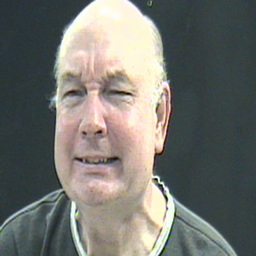

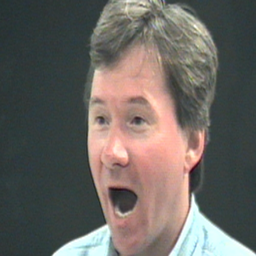

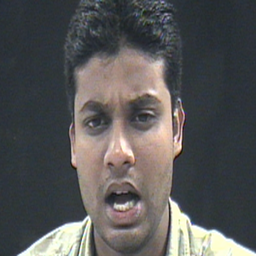

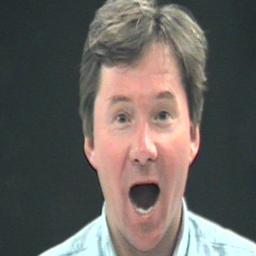

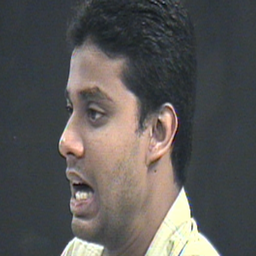

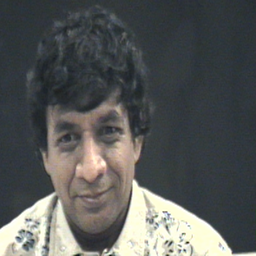

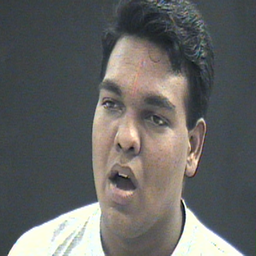

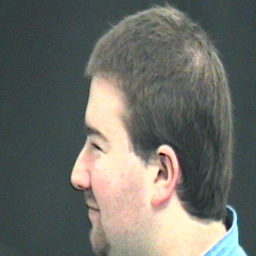

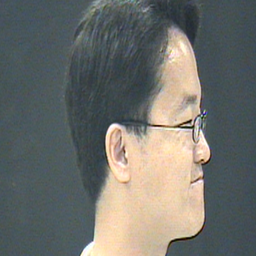

In [3]:
test_path = "Iris/real_A_train"
outpath =  "Iris/new_real_A_train"
#dirs = os.listdir(path)
neww, newh = 256, 256

def resize_images(mypath, outpath):
    dirs = os.listdir(mypath)
    counter = 1
    for item in dirs:
        fullpath = os.path.join(mypath, item)
        if os.path.isfile(fullpath):
            counter += 1
            im = Image.open(fullpath)
            f, e = os.path.splitext(fullpath) #file and extension
            resized = im.resize((neww, newh), Image.ANTIALIAS) #resize
            save_fname = os.path.join(outpath, os.path.basename(f) +'.bmp')
            resized.save(save_fname, quality=100)
            if counter <=10:
                display(resized) #see in notebook

resize_images(test_path, outpath)

Resize train B set.

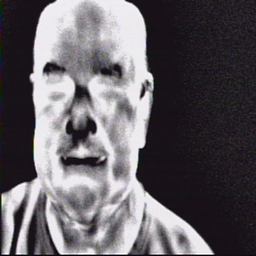

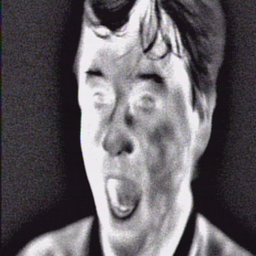

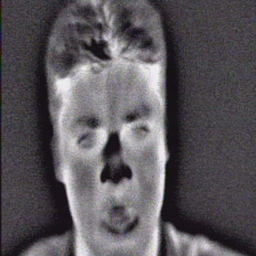

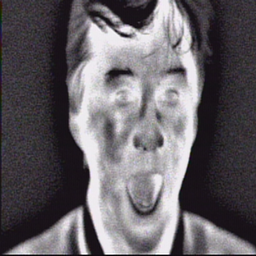

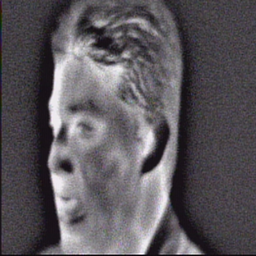

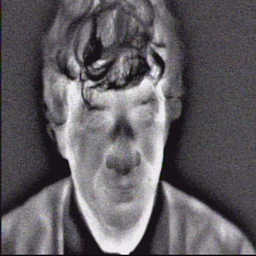

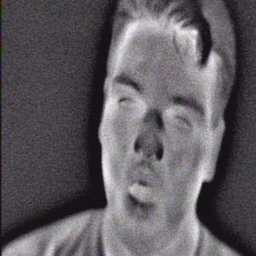

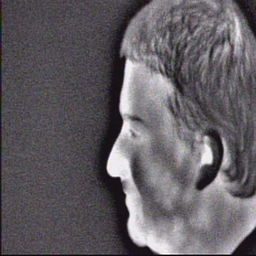

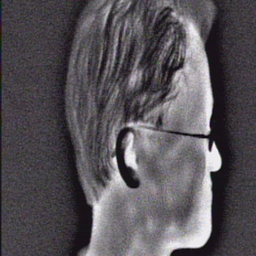

In [4]:
test_path = "Iris/real_B_train"
outpath =  "Iris/new_real_B_train"
resize_images(test_path, outpath)

Crop the Iris images for: 

- real_A_train
- real_A_test
- real_B_train
- real_B_test

In [5]:
# EYES

def crop_eyes(image):

    # image is file path
    im = Image.open(image) 
    
    # Setting the points for cropped image 
    left = 256 / 6
    top = 256 / 2.5 #3
    right = 256 - (256/6) #25% to the right in
    bottom = 256  - 90 #110
    # Cropped image of above dimension 
    # (It will not change orginal image) 
    im1 = im.crop((left, top, right, bottom)) 
    f, e = os.path.splitext(image)
    name = os.path.basename(f) # I need the filename to match it up right
    # Shows the image in image viewer 
    im1.save('Iris/crops_real_A_train/crop_eyes/{}.png'.format(name))
    


infile = 'Iris/real_A_train/'
#crop1_arrays = [] #just a list of arrays

dirs = os.listdir(infile)
print(dirs)
for item in dirs:
    fullpath = os.path.join(infile, item)
    crop_eyes(fullpath)


['Mark-1621.bmp', 'Gribok-1066.bmp', 'hari-1071.bmp', 'Gribok-1072.bmp', 'hari-1059.bmp', 'Nash-222.bmp', 'Rangan-54.bmp', 'Justin-1180.bmp', 'Sangkyu-252.bmp', 'Faysal-189.bmp', 'Kong-1108.bmp', 'Mark-1351.bmp', 'priya-1250.bmp', 'Sharon-1409.bmp', 'priya-1244.bmp', 'Sharon-1390.bmp', 'Sangkyu-285.bmp', 'Mark-1392.bmp', 'Tak-218.bmp', 'Faysal-176.bmp', 'Shafik-240.bmp', 'Sarath-212.bmp', 'Charles-206.bmp', 'Balage-969.bmp', 'Mattew-1539.bmp', 'Balage-982.bmp', 'Kong-1097.bmp', 'Uma-1056.bmp', 'Chris-1303.bmp', 'priya-1132.bmp', 'brad-46.bmp', 'Rangan-435.bmp', 'Mattew-1075.bmp', 'Michael-77.bmp', 'Mattew-1048.bmp', 'brad-53.bmp', 'hari-1138.bmp', 'Michael-88.bmp', 'Kong-1257.bmp', 'priya-1127.bmp', 'vivek-1228.bmp', 'Mattew-1510.bmp', 'Justin-1234.bmp', 'bernard-562.bmp', 'David-1116.bmp', 'Justin-1220.bmp', 'Sarath-207.bmp', 'Koschan-1812.bmp', 'Koschan-1755.bmp', 'Tak-225.bmp', 'Shafik-282.bmp', 'Shafik-296.bmp', 'David-1062.bmp', 'priya-1084.bmp', 'Mattew-1128.bmp', 'Nash-237.bmp',

In [6]:
# MOUTH

def crop_mouth(image):

    # image is file path
    im = Image.open(image) 
    
    # Setting the points for cropped image 
    left = (256/4) #25% to the left in
    top = 256 - 70
    right = 256 - (256/4) #25% to the right in
    bottom = 256 - 20
    # Cropped image of above dimension 
    # (It will not change orginal image) 
    im1 = im.crop((left, top, right, bottom)) 
    f, e = os.path.splitext(image)
    name = os.path.basename(f) # I need the filename to match it up right
    # Shows the image in image viewer 
    im1.save('Iris/crops_real_A_train/crop_mouth/{}.png'.format(name))


infile = 'Iris/real_A_train/'
dirs = os.listdir(infile)
print(dirs)
for item in dirs:
    fullpath = os.path.join(infile, item)
    #img = Image.open(fullpath) # open it
    crop_mouth(fullpath)

['Mark-1621.bmp', 'Gribok-1066.bmp', 'hari-1071.bmp', 'Gribok-1072.bmp', 'hari-1059.bmp', 'Nash-222.bmp', 'Rangan-54.bmp', 'Justin-1180.bmp', 'Sangkyu-252.bmp', 'Faysal-189.bmp', 'Kong-1108.bmp', 'Mark-1351.bmp', 'priya-1250.bmp', 'Sharon-1409.bmp', 'priya-1244.bmp', 'Sharon-1390.bmp', 'Sangkyu-285.bmp', 'Mark-1392.bmp', 'Tak-218.bmp', 'Faysal-176.bmp', 'Shafik-240.bmp', 'Sarath-212.bmp', 'Charles-206.bmp', 'Balage-969.bmp', 'Mattew-1539.bmp', 'Balage-982.bmp', 'Kong-1097.bmp', 'Uma-1056.bmp', 'Chris-1303.bmp', 'priya-1132.bmp', 'brad-46.bmp', 'Rangan-435.bmp', 'Mattew-1075.bmp', 'Michael-77.bmp', 'Mattew-1048.bmp', 'brad-53.bmp', 'hari-1138.bmp', 'Michael-88.bmp', 'Kong-1257.bmp', 'priya-1127.bmp', 'vivek-1228.bmp', 'Mattew-1510.bmp', 'Justin-1234.bmp', 'bernard-562.bmp', 'David-1116.bmp', 'Justin-1220.bmp', 'Sarath-207.bmp', 'Koschan-1812.bmp', 'Koschan-1755.bmp', 'Tak-225.bmp', 'Shafik-282.bmp', 'Shafik-296.bmp', 'David-1062.bmp', 'priya-1084.bmp', 'Mattew-1128.bmp', 'Nash-237.bmp',

In [7]:
# NOSE

def crop_nose(image):

    # image is file path
    im = Image.open(image) 
    
    # Setting the points for cropped image 
    left = 15 #25% to the left in
    top = 160
    right = 220 #25% to the right in
    bottom = 200

    # Cropped image of above dimension 
    # (It will not change orginal image) 
    im1 = im.crop((left, top, right, bottom)) 
    f, e = os.path.splitext(image)
    name = os.path.basename(f) # I need the filename to match it up right
    # Shows the image in image viewer 
    im1.save('Iris/crops_real_A_train/crop_nose/{}.png'.format(name))


infile = 'Iris/real_A_train/'
dirs = os.listdir(infile)
print(dirs)
for item in dirs:
    fullpath = os.path.join(infile, item)
    crop_nose(fullpath)


['Mark-1621.bmp', 'Gribok-1066.bmp', 'hari-1071.bmp', 'Gribok-1072.bmp', 'hari-1059.bmp', 'Nash-222.bmp', 'Rangan-54.bmp', 'Justin-1180.bmp', 'Sangkyu-252.bmp', 'Faysal-189.bmp', 'Kong-1108.bmp', 'Mark-1351.bmp', 'priya-1250.bmp', 'Sharon-1409.bmp', 'priya-1244.bmp', 'Sharon-1390.bmp', 'Sangkyu-285.bmp', 'Mark-1392.bmp', 'Tak-218.bmp', 'Faysal-176.bmp', 'Shafik-240.bmp', 'Sarath-212.bmp', 'Charles-206.bmp', 'Balage-969.bmp', 'Mattew-1539.bmp', 'Balage-982.bmp', 'Kong-1097.bmp', 'Uma-1056.bmp', 'Chris-1303.bmp', 'priya-1132.bmp', 'brad-46.bmp', 'Rangan-435.bmp', 'Mattew-1075.bmp', 'Michael-77.bmp', 'Mattew-1048.bmp', 'brad-53.bmp', 'hari-1138.bmp', 'Michael-88.bmp', 'Kong-1257.bmp', 'priya-1127.bmp', 'vivek-1228.bmp', 'Mattew-1510.bmp', 'Justin-1234.bmp', 'bernard-562.bmp', 'David-1116.bmp', 'Justin-1220.bmp', 'Sarath-207.bmp', 'Koschan-1812.bmp', 'Koschan-1755.bmp', 'Tak-225.bmp', 'Shafik-282.bmp', 'Shafik-296.bmp', 'David-1062.bmp', 'priya-1084.bmp', 'Mattew-1128.bmp', 'Nash-237.bmp',

Same for training set real_B

In [8]:
# EYES

def crop_eyes(image):

    # image is file path
    im = Image.open(image) 
    
    # Setting the points for cropped image 
    left = 256 / 6
    top = 256 / 2.5 #3
    right = 256 - (256/6) #25% to the right in
    bottom = 256  - 90 #110
    # Cropped image of above dimension 
    # (It will not change orginal image) 
    im1 = im.crop((left, top, right, bottom)) 
    f, e = os.path.splitext(image)
    name = os.path.basename(f) # I need the filename to match it up right
    # Shows the image in image viewer 
    im1.save('Iris/crops_real_B_train/crop_eyes/{}.png'.format(name))
    


infile = 'Iris/real_B_train/'
#crop1_arrays = [] #just a list of arrays

dirs = os.listdir(infile)
print(dirs)
for item in dirs:
    fullpath = os.path.join(infile, item)
    crop_eyes(fullpath)


['Mark-1621.bmp', 'Gribok-1066.bmp', 'hari-1071.bmp', 'Gribok-1072.bmp', 'hari-1059.bmp', 'Nash-222.bmp', 'Rangan-54.bmp', 'Justin-1180.bmp', 'Sangkyu-252.bmp', 'Faysal-189.bmp', 'Kong-1108.bmp', 'Mark-1351.bmp', 'priya-1250.bmp', 'Sharon-1409.bmp', 'priya-1244.bmp', 'Sharon-1390.bmp', 'Sangkyu-285.bmp', 'Mark-1392.bmp', 'Tak-218.bmp', 'Faysal-176.bmp', 'Shafik-240.bmp', 'Sarath-212.bmp', 'Charles-206.bmp', 'Balage-969.bmp', 'Mattew-1539.bmp', 'Balage-982.bmp', 'Kong-1097.bmp', 'Uma-1056.bmp', 'Chris-1303.bmp', 'priya-1132.bmp', 'brad-46.bmp', 'Rangan-435.bmp', 'Mattew-1075.bmp', 'Michael-77.bmp', 'Mattew-1048.bmp', 'brad-53.bmp', 'hari-1138.bmp', 'Michael-88.bmp', 'Kong-1257.bmp', 'priya-1127.bmp', 'vivek-1228.bmp', 'Mattew-1510.bmp', 'Justin-1234.bmp', 'bernard-562.bmp', 'David-1116.bmp', 'Justin-1220.bmp', 'Sarath-207.bmp', 'Koschan-1812.bmp', 'Koschan-1755.bmp', 'Tak-225.bmp', 'Shafik-282.bmp', 'Shafik-296.bmp', 'David-1062.bmp', 'priya-1084.bmp', 'Mattew-1128.bmp', 'Nash-237.bmp',

In [9]:
# MOUTH

def crop_mouth(image):

    # image is file path
    im = Image.open(image) 
    
    # Setting the points for cropped image 
    left = (256/4) #25% to the left in
    top = 256 - 70
    right = 256 - (256/4) #25% to the right in
    bottom = 256 - 20
    # Cropped image of above dimension 
    # (It will not change orginal image) 
    im1 = im.crop((left, top, right, bottom)) 
    f, e = os.path.splitext(image)
    name = os.path.basename(f) # I need the filename to match it up right
    # Shows the image in image viewer 
    im1.save('Iris/crops_real_B_train/crop_mouth/{}.png'.format(name))


infile = 'Iris/real_B_train/'
dirs = os.listdir(infile)
print(dirs)
for item in dirs:
    fullpath = os.path.join(infile, item)
    #img = Image.open(fullpath) # open it
    crop_mouth(fullpath)

['Mark-1621.bmp', 'Gribok-1066.bmp', 'hari-1071.bmp', 'Gribok-1072.bmp', 'hari-1059.bmp', 'Nash-222.bmp', 'Rangan-54.bmp', 'Justin-1180.bmp', 'Sangkyu-252.bmp', 'Faysal-189.bmp', 'Kong-1108.bmp', 'Mark-1351.bmp', 'priya-1250.bmp', 'Sharon-1409.bmp', 'priya-1244.bmp', 'Sharon-1390.bmp', 'Sangkyu-285.bmp', 'Mark-1392.bmp', 'Tak-218.bmp', 'Faysal-176.bmp', 'Shafik-240.bmp', 'Sarath-212.bmp', 'Charles-206.bmp', 'Balage-969.bmp', 'Mattew-1539.bmp', 'Balage-982.bmp', 'Kong-1097.bmp', 'Uma-1056.bmp', 'Chris-1303.bmp', 'priya-1132.bmp', 'brad-46.bmp', 'Rangan-435.bmp', 'Mattew-1075.bmp', 'Michael-77.bmp', 'Mattew-1048.bmp', 'brad-53.bmp', 'hari-1138.bmp', 'Michael-88.bmp', 'Kong-1257.bmp', 'priya-1127.bmp', 'vivek-1228.bmp', 'Mattew-1510.bmp', 'Justin-1234.bmp', 'bernard-562.bmp', 'David-1116.bmp', 'Justin-1220.bmp', 'Sarath-207.bmp', 'Koschan-1812.bmp', 'Koschan-1755.bmp', 'Tak-225.bmp', 'Shafik-282.bmp', 'Shafik-296.bmp', 'David-1062.bmp', 'priya-1084.bmp', 'Mattew-1128.bmp', 'Nash-237.bmp',

In [10]:
# NOSE

def crop_nose(image):

    # image is file path
    im = Image.open(image) 
    
    # Setting the points for cropped image 
    left = 15 #25% to the left in
    top = 160
    right = 220 #25% to the right in
    bottom = 200

    # Cropped image of above dimension 
    # (It will not change orginal image) 
    im1 = im.crop((left, top, right, bottom)) 
    f, e = os.path.splitext(image)
    name = os.path.basename(f) # I need the filename to match it up right
    # Shows the image in image viewer 
    im1.save('Iris/crops_real_B_train/crop_nose/{}.png'.format(name))


infile = 'Iris/real_B_train/'
dirs = os.listdir(infile)
print(dirs)
for item in dirs:
    fullpath = os.path.join(infile, item)
    crop_nose(fullpath)

['Mark-1621.bmp', 'Gribok-1066.bmp', 'hari-1071.bmp', 'Gribok-1072.bmp', 'hari-1059.bmp', 'Nash-222.bmp', 'Rangan-54.bmp', 'Justin-1180.bmp', 'Sangkyu-252.bmp', 'Faysal-189.bmp', 'Kong-1108.bmp', 'Mark-1351.bmp', 'priya-1250.bmp', 'Sharon-1409.bmp', 'priya-1244.bmp', 'Sharon-1390.bmp', 'Sangkyu-285.bmp', 'Mark-1392.bmp', 'Tak-218.bmp', 'Faysal-176.bmp', 'Shafik-240.bmp', 'Sarath-212.bmp', 'Charles-206.bmp', 'Balage-969.bmp', 'Mattew-1539.bmp', 'Balage-982.bmp', 'Kong-1097.bmp', 'Uma-1056.bmp', 'Chris-1303.bmp', 'priya-1132.bmp', 'brad-46.bmp', 'Rangan-435.bmp', 'Mattew-1075.bmp', 'Michael-77.bmp', 'Mattew-1048.bmp', 'brad-53.bmp', 'hari-1138.bmp', 'Michael-88.bmp', 'Kong-1257.bmp', 'priya-1127.bmp', 'vivek-1228.bmp', 'Mattew-1510.bmp', 'Justin-1234.bmp', 'bernard-562.bmp', 'David-1116.bmp', 'Justin-1220.bmp', 'Sarath-207.bmp', 'Koschan-1812.bmp', 'Koschan-1755.bmp', 'Tak-225.bmp', 'Shafik-282.bmp', 'Shafik-296.bmp', 'David-1062.bmp', 'priya-1084.bmp', 'Mattew-1128.bmp', 'Nash-237.bmp',